Test Jupyter notebook used to look at Marcus theory examined previously by Prenay. Similar results are obtained (despite issues in previous code with equations). Results are, however, very dependent on the values of certain quantities used. There are interesting questions to think about from looking at the various dimer molecules. 

In [10]:
const thz2au = 0.0001519828500716
const invcm2au = 4.55633e-6
const au2fs = 0.02418884254
const mev2invcm = 8.066
const mev2au = mev2invcm * invcm2au
const mev2J = 1.6*10^(-19)*10^(-3)
const nm2au = 18.897

print(mev2au)

3.6751357780000004e-5

In [11]:
using OrdinaryDiffEq
using DelimitedFiles
using LinearAlgebra
using Sundials

In [12]:
function Y6UpconversionDimerHamiltonianWTriplet(soc::Float64, Vct::Float64)

    # Params from Samuele paper

    # D1 dimer dynamics - FE vs CT character over time.

    reorg = [157.0, 157.0, 240.0, 240.0, 157.0]*mev2au
    #reorg got from Table S1 from Samuelle paper. 
    #157mev comes from the exciton 
    #240ev comes from the average of cation and anion reorganisation energy. 
    #Obviously would be good to calculate our own values for these. 
    #These are only calculated for one molecule and not for the dimer complex. 
    #Would be good to calculate more accurate reorganisation energies. 

    cutoff = repeat([1600 * invcm2au], 5)
    #I am currently unsure where the cut-off comes from in the paper. 

    #Efe = 2046.0
    Ect(r) = (2.19 -  4.959/(r))*1000  #best fit equation for Ect
    #Equation comes from Eq. S10 of the supplementary information coverted energy into mev. 
    #epsilon taken as 2.9 and r is measured in angstroms 
    Dh = 55.7
    De = 72.0
    V = -76.0
    #Values taken from S3 table using First Dimer molecule. 
    #There is an interesting question of how the results vary when different Dimer values are used?

    Ec = Ect(9.29)
    # r value for CT taken from the distance for the first Dimer molecule. 
    #Again the question comes as to what happens if you choose another dimer molecue out of 8 close contact dimers. 
    #I think the results will vary as the energies are different 
    #Ec is around 1.656ev (Lowest energy of all states in the system). This is the essential reason for the results below 
    #If you look at Figure S8 I believe that for D9 and D10 we may see different behaviour as here Frenkel more stable. 
    #More importantly the driving force really does vary depend on the dimer complex used

  
    # Dimer Hamiltonian including triplet with placeholder SoC and Vct placeholder 
    #Obviously need to calculate a more accurate value for the SoC and Vct. 

    # Zhenghan singlet values could calculate more accurately. 
    #Suggestion I could calculate for each of the Dimers the energies individually. 

    Efe1 = 1872.0
    Efe2 = 1886.0

    # Zhenghan triplet values could calculate more accurately. 
    #Suggestion I could calculate for each of the Dimers the energies individually. 
    Et1 = 1350.0
    Et2 = 1393.0

    #Ett = Et1 + Et2

    Ett = 2000.0

    #I am very confused by the value of the triplet energy used in the calculation currently. 
    #It is important to understand as this is the key reason for the results currently seen 

    H0 = Matrix{ComplexF64}([
        Efe1 V Dh De soc 
        V Efe2 De Dh soc 
        Dh De Ec 0.0 Vct 
        De Dh 0.0 Ec Vct 
        soc soc Vct Vct Ett
    ]) *mev2au


    return reorg, cutoff, H0
end

Y6UpconversionDimerHamiltonianWTriplet (generic function with 1 method)

In [13]:
Marcus(V, ΔE, β, λ) =2*pi*((V^2 * sqrt(β))/sqrt(4*π*λ))*exp(-1*β*(λ+ΔE)^2/(4*λ))
1/(4.136*10^-12*mev2au)
#Marcus theory equation is incorrect in his code. Forgot to square the energy term. Has been corrected above 
#Note that when using this rate constant we using time in atomic units. This is fine but when comparing to other values in literature 
#times by 1/(4.136*10^-12*mev2au) term above. 

#Hamiltonian generated is correct in his code beside caveat on better ways to calculate quantities in equation. 
λ, γ, H = Y6UpconversionDimerHamiltonianWTriplet(71.0, 162.0)


#Issue comes with his Marcus Theory equations that he does not calculate different rates for forward and reverse reactions.
#Below different rates are calculated for forward and reverse reactions. 
#Have done this below and slightly redifined the constants differently. 

β = 1052.0
const kf1f2 = Marcus(real.(H[1,2]), real.(H[2,2] - H[1,1]), β, λ[1])
const kf2f1 = Marcus(real.(H[1,2]), real.(H[1,1] - H[2,2]), β, λ[1])
const kfc1 = Marcus(real.(H[1,3]), real.(H[3,3] - H[1,1]), β, λ[3])
const kcf1 = Marcus(real.(H[1,3]), real.(H[1,1] - H[3,3]), β, λ[3])
const kfc2 = Marcus(real.(H[2,3]), real.(H[3,3] - H[2,2]), β, λ[3])
const kcf2 = Marcus(real.(H[2,3]), real.(H[2,2] - H[3,3]), β, λ[3])
const kct = Marcus(real.(H[4,5]), real.(H[5,5] - H[4,4]), β, λ[3])
const ktc = Marcus(real.(H[4,5]), real.(H[4,4] - H[5,5]), β, λ[3])
const kft1 = Marcus(real.(H[1,5]), real.(H[5,5] - H[1,1]), β, λ[5])
const ktf1 = Marcus(real.(H[1,5]), real.(H[1,1] - H[5,5]), β, λ[5])
const kft2 = Marcus(real.(H[2,5]), real.(H[5,5] - H[2,2]), β, λ[5])
const ktf2 = Marcus(real.(H[2,5]), real.(H[2,2] - H[5,5]), β, λ[5])

println(kf1f2, "\n Couping between FE1 +FE2 states")
println(kf2f1, "\n Couping between FE2 and FE1 states")
println(kfc1, "\n Couping between FE1 and CT states")
println(kcf1, "\n Couping between CT and FE1 states")
println(kfc2, "\n Couping between FE2 and CT states")
println(kcf2, "\n Couping betwee CT and FE2 states")
println(kct, "\n Couping between CT and triplet states")
println(ktc, "\n Couping between triplet and CT states")
println(kft1, "\n Couping between FE1 and triplets states")
println(ktf1, "\n Couping between triplets and FE1 states")
println(kft2, "\n Couping between FE2 and triplets states")
println(ktf2, "\n Couping between triplets and FE2 states")







0.0009757793304354722
 Couping between FE1 +FE2 states
0.0016765786237618486
 Couping between FE2 and FE1 states
0.0025052688621312862
 Couping between FE1 and CT states
5.961920787918113e-7
 Couping between CT and FE1 states
0.0042680792320404165
 Couping between FE2 and CT states
5.911422818832416e-7
 Couping betwee CT and FE2 states
2.3728323477505632e-8
 Couping between CT and triplet states
0.014059430987154372
 Couping between triplet and CT states
3.470094761164756e-5
 Couping between FE1 and triplets states
0.0048929850137793465
 Couping between triplets and FE1 states
5.6035426188869665e-5
 Couping between FE2 and triplets states
0.0045985712530867235
 Couping between triplets and FE2 states


In [14]:
#Function whoses differential equations we plan to solve. 
#NB Different rates for forward and reverse reactions have been used. 
#In previous code by Prenay the same rates are used for the forward and reverse reaction which is not correct
#Assumed only one energy for charge transfer complex. 
#I am slightly confused why we have two charge transfer energies (which are the same) and only one triplet state 

function func_semi2!(du, u, p, t)
    du[1]=-(kf1f2 + 2*kfc1 + kft1)*u[1]+kf2f1*u[2]+kcf1*u[3]+kcf1*u[4]+ktf1*u[5]
    du[2]=kf1f2*u[1] -(kf2f1 + 2*kfc2 + kft2)*u[2]+ kcf2*u[3]+ kcf2*u[4]+ ktf2*u[5]
    du[3]=kfc1*u[1]+kfc2*u[2] -(kcf1+kcf2+kct)*u[3]+ ktc*u[5]
    du[4]=kfc1*u[1]+kfc2*u[2]  -(kcf1+kcf2 + kct)*u[4]+ ktc*u[5]
    du[5]=kft1*u[1]+kft2*u[2]+kct*u[3]+kct*u[4] -(ktf1+ktf2 + 2*ktc)*u[5]
end


func_semi2! (generic function with 1 method)

In [15]:
#Code used to solve the ODE problem. Could have alternatively solved using Matrix method. 
#The way this code is written is slightly laborius was really done for quick and easily readable testing 
p0=[1;0;0;0;0]
tspan = (0.0, 1000)
prob = ODEProblem(func_semi2!, p0, tspan, saveat=0.1)
sol = solve(prob, Tsit5())
t = sol.t
ps = sol.u
P_1_array=[]
P_2_array=[]
P_3_array=[]
P_4_array=[]
P_5_array=[]
for t_idx in range(1, length(t))
        Pop=ps[t_idx]
        push!(P_1_array, Pop[1])
        push!(P_2_array, Pop[2])
        push!(P_3_array, Pop[3])
        push!(P_4_array, Pop[4])
        push!(P_5_array, Pop[5])
end


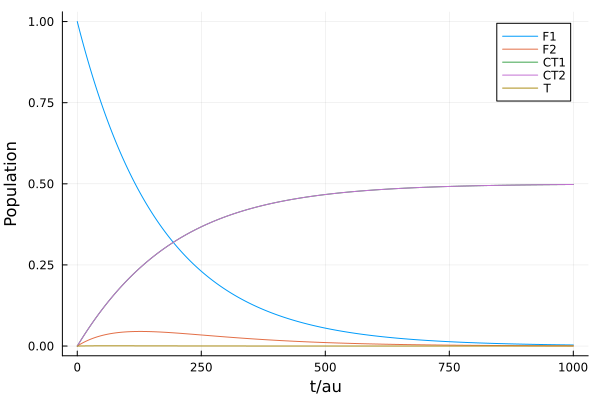

In [16]:
#Code used to plot data generated from ODE method solving Marcus theory 
using Plots
y1=P_1_array
y2=P_2_array
y3=P_3_array
y4=P_4_array
y5=P_5_array
plot(t, [y1, y2, y3, y4, y5], label=["F1" "F2" "CT1" "CT2" "T"])
xlabel!("t/au")
ylabel!("Population")



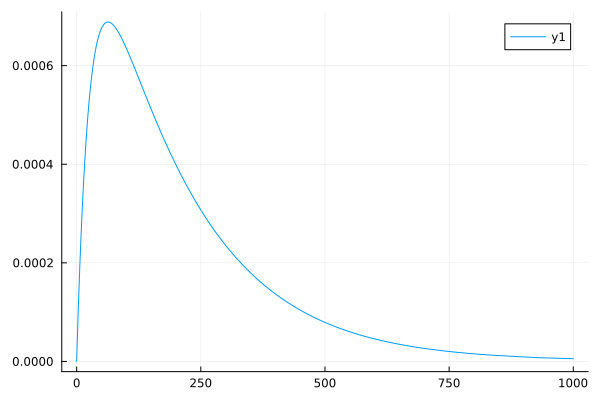

In [17]:
plot(t, y5)

In [18]:
Ect=1656 
ETT=2000 
EF1=1872
EF2=1886
println(Ect-ETT) 
println("240< 344 inverse marcus region")
println(Ect-EF1)
println("240>216 normal marcus region")
println(Ect-EF2)
println("240> 230 normal marcus region")
println(EF1-ETT)
println("157>128 normal marcus region")
println(EF2-ETT)
println("157>114 normal marcus region")

-344
240< 344 inverse marcus region
-216
240>216 normal marcus region
-230
240> 230 normal marcus region
-128
157>128 normal marcus region
-114
157>114 normal marcus region
